<a href="https://colab.research.google.com/github/Navjotkhatri/EDA-Play-Store-App-Review-Analysis/blob/main/EDA_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [273]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [274]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [275]:
working_dir_path="/content/drive/MyDrive/Colab Notebooks/python/EDA-Play Store App Review Analysis/Play Store Data.csv"
ps_df=pd.read_csv(working_dir_path)

# ***Data framing and Data cleaning***

In [276]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [277]:
ps_df.shape

(10841, 13)

In [278]:
working_dir_path2="/content/drive/MyDrive/Colab Notebooks/python/EDA-Play Store App Review Analysis/User Reviews.csv"
ps_df2=pd.read_csv(working_dir_path2)

In [279]:
ps_df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [280]:
ps_df2.shape

(64295, 5)

In [281]:
ps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [282]:
ps_df[ps_df["Rating"]>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [283]:
play_store_df=ps_df.drop(ps_df.index[[10472]])

In [284]:
play_store_df.shape

(10840, 13)

In [285]:
play_store_df.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [286]:
print(list(play_store_df.columns))

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [287]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [288]:
play_store_df = play_store_df.astype({"Reviews": int})

In [289]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [290]:
play_store_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [291]:
df_df=play_store_df["App"].nunique()
df_df

9659

In [292]:
right_df=play_store_df.drop_duplicates(subset='App')
right_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [293]:
right_df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [294]:
right_df.Rating.fillna(4.19, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [295]:
right_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [296]:
number_of_category=right_df["Category"].unique()
print(number_of_category)


['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [297]:
right_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.50,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.19,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.50,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [298]:
price_df=right_df[["App","Price","Type"]]
price_df

,App,Price,Type
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,Free
1,Coloring book moana,0,Free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,Free
3,Sketch - Draw & Paint,0,Free
4,Pixel Draw - Number Art Coloring Book,0,Free
...,...,...,...
10836,Sya9a Maroc - FR,0,Free
10837,Fr. Mike Schmitz Audio Teachings,0,Free
10838,Parkinson Exercices FR,0,Free
10839,The SCP Foundation DB fr nn5n,0,Free


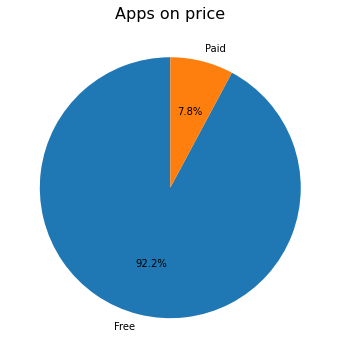

In [299]:
plt.figure(figsize=(8,6))
plt.title("Apps on price",fontsize = 16)
plt.pie(price_df.Type.value_counts(), labels=price_df.Type.value_counts().index,autopct='%1.1f%%',startangle=90)
plt.show()


In [300]:
grouped = right_df[['App','Content Rating']]
grouped

,App,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,Everyone
1,Coloring book moana,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Everyone
3,Sketch - Draw & Paint,Teen
4,Pixel Draw - Number Art Coloring Book,Everyone
...,...,...
10836,Sya9a Maroc - FR,Everyone
10837,Fr. Mike Schmitz Audio Teachings,Everyone
10838,Parkinson Exercices FR,Everyone
10839,The SCP Foundation DB fr nn5n,Mature 17+


In [301]:
grouped1= grouped.rename(columns={'Content Rating': 'age_group'})
grouped1

,App,age_group
0,Photo Editor & Candy Camera & Grid & ScrapBook,Everyone
1,Coloring book moana,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Everyone
3,Sketch - Draw & Paint,Teen
4,Pixel Draw - Number Art Coloring Book,Everyone
...,...,...
10836,Sya9a Maroc - FR,Everyone
10837,Fr. Mike Schmitz Audio Teachings,Everyone
10838,Parkinson Exercices FR,Everyone
10839,The SCP Foundation DB fr nn5n,Mature 17+


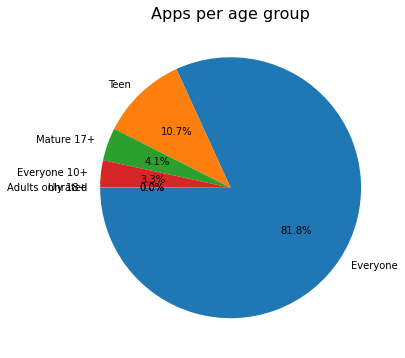

In [302]:
plt.figure(figsize=(10,6))
plt.title("Apps per age group",fontsize = 16)
plt.pie(grouped1.age_group.value_counts(), labels=grouped1.age_group.value_counts().index,autopct='%1.1f%%',startangle=180)
plt.show()

In [303]:
df=right_df.groupby('Category')['App'].nunique().reset_index(name="Total Apps")
df

,Category,Total Apps
0,ART_AND_DESIGN,64
1,AUTO_AND_VEHICLES,85
2,BEAUTY,53
3,BOOKS_AND_REFERENCE,222
4,BUSINESS,420
5,COMICS,56
6,COMMUNICATION,315
7,DATING,171
8,EDUCATION,119
9,ENTERTAINMENT,102


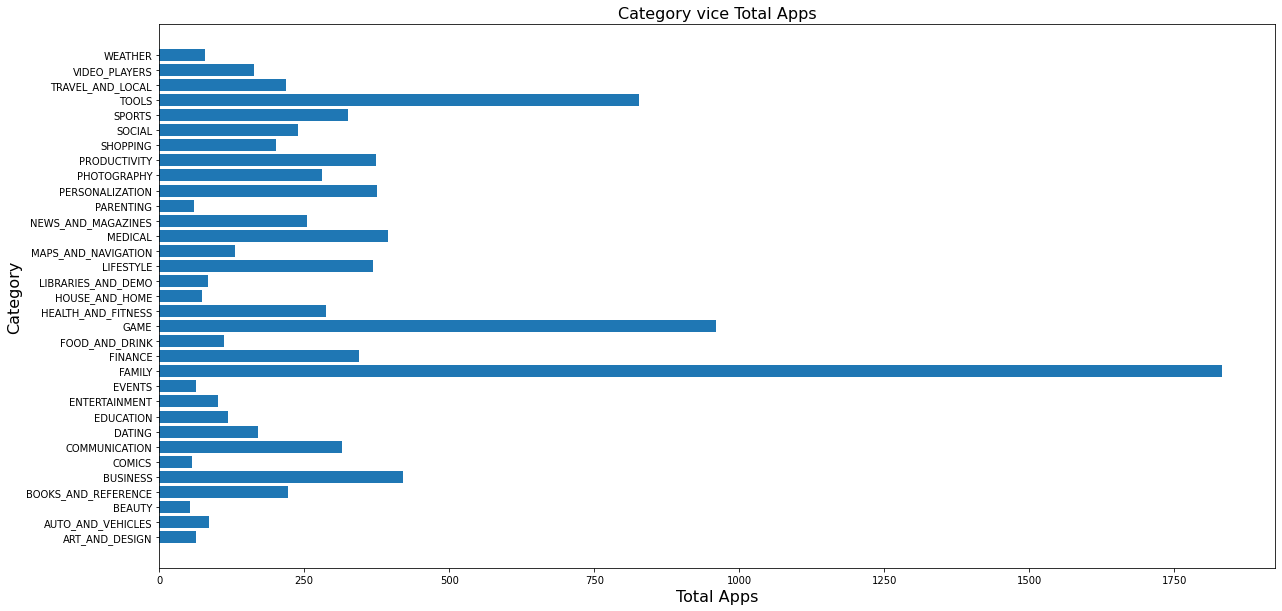

In [304]:
c1=df['Category']
t1= df['Total Apps']
fig = plt.figure(figsize = (20, 10))
plt.barh(c1,t1)
plt.title("Category vice Total Apps",fontsize=16)
plt.xlabel("Total Apps",fontsize=16)
plt.ylabel("Category",fontsize=16)
plt.show()

In [305]:
category=df.sort_values(by='Total Apps', ascending=False)
top_five_category=category.head()
least_five_category=category.tail()

In [306]:
top_five_category.reset_index()

,index,Category,Total Apps
0,11,FAMILY,1832
1,14,GAME,959
2,29,TOOLS,827
3,4,BUSINESS,420
4,20,MEDICAL,395


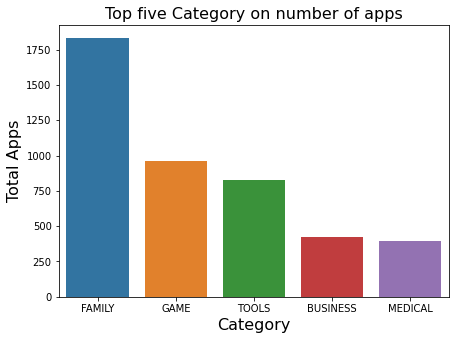

In [307]:
fig = plt.figure(figsize = (7, 5))
sns.barplot(data=top_five_category, x="Category", y="Total Apps")
plt.title("Top five Category on number of apps",fontsize=16)
plt.xlabel("Category",fontsize=16)
plt.ylabel("Total Apps",fontsize=16)
plt.show()

In [308]:
least_five_category.reset_index()

,index,Category,Total Apps
0,10,EVENTS,64
1,0,ART_AND_DESIGN,64
2,22,PARENTING,60
3,5,COMICS,56
4,2,BEAUTY,53


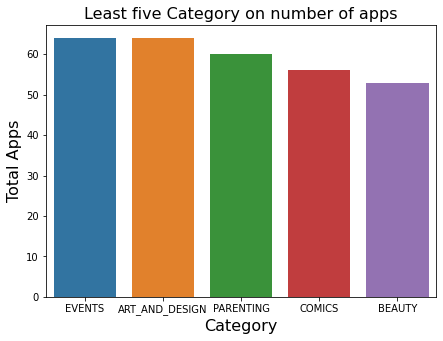

In [309]:
fig = plt.figure(figsize = (7, 5))
sns.barplot(data=least_five_category, x="Category", y="Total Apps")
plt.title("Least five Category on number of apps",fontsize=16)
plt.xlabel("Category",fontsize=16)
plt.ylabel("Total Apps",fontsize=16)
plt.show()

In [310]:
right_df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [311]:
df1 =right_df[["App","Category","Rating","Reviews","Installs","Price","Type","Genres","Content Rating"]]
df1

,App,Category,Rating,Reviews,Installs,Price,Type,Genres,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,"10,000+",0,Free,Art & Design,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.90,967,"500,000+",0,Free,Art & Design;Pretend Play,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,"5,000,000+",0,Free,Art & Design,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,"50,000,000+",0,Free,Art & Design,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,"100,000+",0,Free,Art & Design;Creativity,Everyone
...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.50,38,"5,000+",0,Free,Education,Everyone
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4,100+,0,Free,Education,Everyone
10838,Parkinson Exercices FR,MEDICAL,4.19,3,"1,000+",0,Free,Medical,Everyone
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,114,"1,000+",0,Free,Books & Reference,Mature 17+


In [312]:
top_installers=df1.sort_values(by='Installs', ascending=False)
top_apps_by_instolation=top_installers.head(24)
top_installers.head(25)

,App,Category,Rating,Reviews,Installs,Price,Type,Genres,Content Rating
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,"500,000,000+",0,Free,Communication,Teen
1722,My Talking Tom,GAME,4.5,14891223,"500,000,000+",0,Free,Casual,Everyone
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,"500,000,000+",0,Free,Tools,Everyone
3255,SHAREit - Transfer & Share,TOOLS,4.6,7790693,"500,000,000+",0,Free,Tools,Everyone
3235,Google Translate,TOOLS,4.4,5745093,"500,000,000+",0,Free,Tools,Everyone
2546,Facebook Lite,SOCIAL,4.3,8606259,"500,000,000+",0,Free,Social,Teen
5596,Samsung Health,HEALTH_AND_FITNESS,4.3,480208,"500,000,000+",0,Free,Health & Fitness,Everyone
371,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,"500,000,000+",0,Free,Communication,Everyone
2550,Snapchat,SOCIAL,4.0,17014787,"500,000,000+",0,Free,Social,Teen
3265,Gboard - the Google Keyboard,TOOLS,4.2,1859115,"500,000,000+",0,Free,Tools,Everyone


In [313]:
top_apps_by_instolation

,App,Category,Rating,Reviews,Installs,Price,Type,Genres,Content Rating
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,"500,000,000+",0,Free,Communication,Teen
1722,My Talking Tom,GAME,4.5,14891223,"500,000,000+",0,Free,Casual,Everyone
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,"500,000,000+",0,Free,Tools,Everyone
3255,SHAREit - Transfer & Share,TOOLS,4.6,7790693,"500,000,000+",0,Free,Tools,Everyone
3235,Google Translate,TOOLS,4.4,5745093,"500,000,000+",0,Free,Tools,Everyone
2546,Facebook Lite,SOCIAL,4.3,8606259,"500,000,000+",0,Free,Social,Teen
5596,Samsung Health,HEALTH_AND_FITNESS,4.3,480208,"500,000,000+",0,Free,Health & Fitness,Everyone
371,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,"500,000,000+",0,Free,Communication,Everyone
2550,Snapchat,SOCIAL,4.0,17014787,"500,000,000+",0,Free,Social,Teen
3265,Gboard - the Google Keyboard,TOOLS,4.2,1859115,"500,000,000+",0,Free,Tools,Everyone


In [314]:
rating_df=top_apps_by_instolation[["App","Rating","Reviews"]]
rating_df

,App,Rating,Reviews
378,UC Browser - Fast Download Private & Secure,4.5,17712922
1722,My Talking Tom,4.5,14891223
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",4.7,24900999
3255,SHAREit - Transfer & Share,4.6,7790693
3235,Google Translate,4.4,5745093
2546,Facebook Lite,4.3,8606259
5596,Samsung Health,4.3,480208
371,Google Duo - High Quality Video Calls,4.6,2083237
2550,Snapchat,4.0,17014787
3265,Gboard - the Google Keyboard,4.2,1859115


In [315]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 378 to 1661
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   App      24 non-null     object 
 1   Rating   24 non-null     float64
 2   Reviews  24 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 768.0+ bytes


In [316]:
rating_df = rating_df.astype({"Reviews": int})

In [317]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 378 to 1661
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   App      24 non-null     object 
 1   Rating   24 non-null     float64
 2   Reviews  24 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 768.0+ bytes


In [318]:
ratings=rating_df.sort_values(by='Reviews', ascending=False).reset_index()
ratings

,index,App,Rating,Reviews
0,4005,Clean Master- Space Cleaner & Antivirus,4.7,42916526
1,7536,"Security Master - Antivirus, VPN, AppLock, Boo...",4.7,24900999
2,1655,Candy Crush Saga,4.4,22426677
3,378,UC Browser - Fast Download Private & Secure,4.5,17712922
4,2550,Snapchat,4.0,17014787
5,1722,My Talking Tom,4.5,14891223
6,3739,Twitter,4.3,11667403
7,342,Viber Messenger,4.3,11334799
8,403,LINE: Free Calls & Messages,4.2,10790289
9,1662,Pou,4.3,10485308


In [319]:
least_apps=ratings.tail()
least_apps

,index,App,Rating,Reviews
19,3265,Gboard - the Google Keyboard,4.2,1859115
20,3755,Flipboard: News For Our Time,4.4,1284017
21,3476,Google Calendar,4.2,858208
22,5596,Samsung Health,4.3,480208
23,3574,Cloud Print,4.1,282460


In [320]:
df2=play_store_df[play_store_df['Category']=="FAMILY"]
df2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2014,YouTube Kids,FAMILY,4.5,470694,Varies with device,"50,000,000+",Free,0,Everyone,Entertainment;Music & Video,"August 3, 2018",3.43.3,4.1 and up
2015,Candy Bomb,FAMILY,4.4,42145,20M,"10,000,000+",Free,0,Everyone,Casual;Brain Games,"July 4, 2018",2.9.3181,4.0.3 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2017,Jewels Crush- Match 3 Puzzle,FAMILY,4.4,14774,19M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 23, 2018",1.9.3901,4.0.3 and up
2018,Coloring & Learn,FAMILY,4.4,12753,51M,"5,000,000+",Free,0,Everyone,Educational;Creativity,"July 17, 2018",1.49,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,Poop FR,FAMILY,NaN,6,2.5M,50+,Free,0,Everyone,Entertainment,"May 29, 2018",1.0,4.0.3 and up
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


In [321]:
ratings=df2.sort_values(by='Rating', ascending=False)
ratings


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9531,Lyrics of Ek Paheli Leela,FAMILY,5.0,4,2.3M,500+,Free,0,Everyone,Entertainment,"April 23, 2016",1.0,4.0 and up
7320,CG - Chemistry free,FAMILY,5.0,7,2.3M,"1,000+",Free,0,Everyone,Education,"May 25, 2018",1.0,4.0.3 and up
7307,CG FM,FAMILY,5.0,2,6.6M,500+,Free,0,Everyone,Entertainment,"January 31, 2018",1.0.9,4.1 and up
7239,CF Life,FAMILY,5.0,4,8.3M,100+,Free,0,Everyone,Education,"June 27, 2018",3.8.0,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,NaN,17,157k,100+,Paid,$0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up
10751,FP Market,FAMILY,NaN,24,44k,"1,000+",Free,0,Everyone,Education,"June 17, 2012",1.0,1.6 and up
10794,PopStar,FAMILY,NaN,13,5.7M,"1,000+",Free,0,Everyone,Casual,"January 3, 2018",1.6,4.3 and up
10798,Word Search Tab 1 FR,FAMILY,NaN,0,1020k,50+,Paid,$1.04,Everyone,Puzzle,"February 6, 2012",1.1,3.0 and up


In [322]:
top_installers=df2.sort_values(by='Installs', ascending=False)
top_installers.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3994,Candy Crush Saga,FAMILY,4.4,22419455,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
3888,My Talking Tom,FAMILY,4.5,14885236,Varies with device,"500,000,000+",Free,0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up
3879,Pou,FAMILY,4.3,10483141,24M,"500,000,000+",Free,0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up
4077,E-cigarette for free,FAMILY,3.6,1354,4.8M,"500,000+",Free,0,Mature 17+,Entertainment,"October 23, 2017",1.0,2.3 and up
7027,UNICORN - Color By Number & Pixel Art Coloring,FAMILY,4.7,8264,24M,"500,000+",Free,0,Everyone,Art & Design;Creativity,"August 2, 2018",1.0.9,4.4 and up


In [323]:
apps_vs_instalers=top_installers[["App","Rating","Installs"]].head().reset_index()
apps_vs_instalers


,index,App,Rating,Installs
0,3994,Candy Crush Saga,4.4,"500,000,000+"
1,3888,My Talking Tom,4.5,"500,000,000+"
2,3879,Pou,4.3,"500,000,000+"
3,4077,E-cigarette for free,3.6,"500,000+"
4,7027,UNICORN - Color By Number & Pixel Art Coloring,4.7,"500,000+"
